2
M= 13.03022991994061512.974011933129804
k_P= 0.0020.000277985080193483760.000113386590816922974.518671967799707e-58.640251470831085e-6
k_IP= 0.0070.000274923465760389560.000112137797094890074.4689051554750864e-58.545091260828998e-6
Mean(Qsim)= 0.0029229287384265265
123.38
KGE=0.65
NSE=0.408
bias=0.868
Time elapsed[s]= 935.7635412


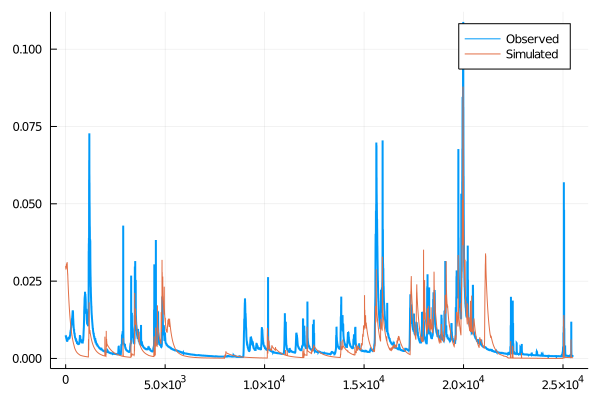

In [4]:
"""
Runs DDD model either in single run model or for calibration
The model itself is called as a function which calls on several functions
"""
#using CSV
using Distributions
using LsqFit
using Statistics
using Dates
using DataFrames
using Plots
using CSV
using BlackBoxOptim

##Preprocessing routines
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\Big2SmallLambda.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\CeleritySubSurface.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SingleUH.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerEstimation.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\PyrAreas.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\TemperatureVector.jl")

##EB and Snow Routines
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NedbEBGlac_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SnowpackTemp.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SmeltEBGlac_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\CloudCoverGlac_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\TssDewpoint.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SolradTransAlbedoper_hrs_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LongWaveRad_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SensibleLatHeat_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\AlbedoUEB_debug04072022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\GroundPrecCC.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\SnowGamma.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\Varc.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NewSnowDensityEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NewSnowSDEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\DensityAge.jl")
#Subsurface and Evaporation routines
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerCapacityUpdate.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\PotentialEvapPT.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\UnsaturatedEvapEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerEvap.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\UnsaturatedExEvap.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\WetlandsEB.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\GrvInputDistributionICap2022.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\OFICap.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\LayerUpdate.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\BogLayerUpdate.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\RiverUpdate.jl")
## Overland Flow routine
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\OverlandFlowDynamicDD.jl")
## Efficiency criteria
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\NSEJM.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\KGEJM.jl")
# Model Module
#include("F:\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\DDDUrbanFunc.jl")
include("\\\\nve.no\\fil\\h\\HB\\HB-modellering\\DDDtestbenk\\DDD_Julia\\DDDFunctions\\DDDUrbanFunc10012024_InfWB.jl")
########################################################################################

catchment = "123.38"  # stationnumber


ptqfile = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\inndata\\Risvollan\\",
    catchment,"_5min_ptq_kal_ny.csv")
r2fil = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\utdata\\Risvollan\\r2fil_",catchment,
    "_kal_R5_2.csv")
utfile  = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\utdata\\Risvollan\\simres_",
    catchment,"_SMfordJan2024_R5.csv")

#paramfile = string("\\\\nve.no\\fil\\h\\HV\\Bruker\\aktv\\DDDUrban\\Sandsli\\parameters\\Par_", 
#    catchment,"_DTM1_5000_5.csv")

paramfile = string("\\\\nve.no\\fil\\h\\HM\\Interne Prosjekter\\UrbanDesignFlom\\DDDUrbanParameters\\",
    catchment,"\\Best_par_",catchment,"_5min_R5_2.csv")


spinup = (31*4) #days used to spin up the model. 

prm = CSV.read(paramfile,DataFrame,header=["Name", "val"], delim=';')
#prm = CSV.read(paramfile,header=["Name", "val"], delim=';')

#            u,          pro           TX,         Pkorr        OFP,        GshInt,       GscInt      persons
tprm = [prm.val[17], prm.val[18], prm.val[19], prm.val[15], prm.val[51], prm.val[53], prm.val[54], prm.val[56]]

Gshape, Gscale = Big2SmallLambda(prm.val[53], prm.val[54]) # Coverting integrated celerity to layers takes too long in calibration: preprocessing
Gpar = [Gshape, Gscale]


startsim = 1
kal = 0
modstate = 0
savestate = 0

t1= time_ns()

function calib_wrapper_model(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate, kal, spinup)
 qobs, qberegn, KGE, NSE, bias = DDDUrbanFunc(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate,
        kal, spinup)  
 return qobs,qberegn, KGE,NSE,bias 
end

function calib_single_wsh(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate, kal, spinup)
 qobs, qberegn, KGE, NSE, bias = DDDUrbanFunc(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil, modstate, savestate,
        kal, spinup)    
 return (1.0 - KGE)
end

if(kal == 0)
    qobs,qberegn,KGE,NSE, bias = calib_wrapper_model(Gpar,startsim, tprm, prm, ptqfile, utfile, r2fil,
        modstate, savestate,kal, spinup) # a single run 
    
    println(catchment)
    println("KGE=",round(KGE,digits=3))
    println("NSE=",round(NSE,digits=3))
    println("bias=",round(bias,digits=3))
end

if(kal == 1) # calibrate
    #                   u,        pro,         TX,               Pkorr,    OFP,        GshInt,   GscInt,         Persons 
    param_range = [(1.0,3.0), (0.05,0.05), (tprm[3],tprm[3]), (0.5, 1.5), (0.001,0.01),(tprm[6],tprm[6]),(tprm[7],tprm[7]),
        (tprm[8],tprm[8])] # 
    #param_range = [(1.5,1.5), (0.05,0.05), (0.5,0.5), (5.0, 5.0), (0.007,0.007),(1.0,3.0),(0.00015,0.01), (3200.0, 3200.0)] #GK 
    #param_range = [(0.56,0.565), (0.049,0.05), (0.49,0.5), (5.1, 5.2), (2.42,2.44),(0.5,1.5),(0.00015,0.001), (0.01,0.02)] #GR3 min Aas
    #param_range = [(0.5,2.0), (0.05,0.05), (0.5,0.5), (1.0, 5.0), (0.001,0.01),(1.1,2.0),(0.0001,0.01), (0.0,0.0)] #SL 
    
    println(param_range)
    calib_single_wsh_tmp(param) = calib_single_wsh(Gpar,startsim, param, prm, ptqfile, utfile, r2fil,
                                           modstate, savestate, kal, spinup)
    res = bboptimize(calib_single_wsh_tmp; SearchRange = param_range, MaxSteps = 100, TraceMode = :verbose)
    param_hydro = best_candidate(res)
    println(param_hydro)
end

t2 = time_ns()
println("Time elapsed[s]= ",(t2-t1)/1.0e9)

if(kal==0)
 plot(qobs[10000:35500], label = "Observed",lw =2)
 plot!(qberegn[10000:35500],label = "Simulated", lw = 1)
end    